In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
f = "~/github/datasets/598354.csv"
data =  pd.read_csv(f)

In [3]:
data.head()

,STATION,STATION_NAME,DATE,MDPR,DAPR,PRCP,TMAX,TMIN,TOBS
0,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140101,-9999,-9999,-9999,217,83,-9999
1,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140102,-9999,-9999,-9999,217,72,-9999
2,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140103,-9999,-9999,-9999,206,78,-9999
3,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140104,-9999,-9999,-9999,206,94,-9999
4,GHCND:USR0000CTHO,THOMES CREEK CALIFORNIA CA US,20140105,-9999,-9999,-9999,206,100,-9999


In order to select the stations, we can select the following data from the initial amount:

In [4]:
data2 = data[(data.TMIN>-9999)]
data3 = data2[(data2.DATE>=20150601) & (data2.DATE<=20150630) & (data2.PRCP>0)]

So we can print data3 and, then, select the stations in the table that will be printed.

In [5]:
stations = data2[(data2.STATION=='GHCND:USC00047326') | (data2.STATION=='GHCND:USC00047902') | (data2.STATION=='GHCND:USC00044881')]

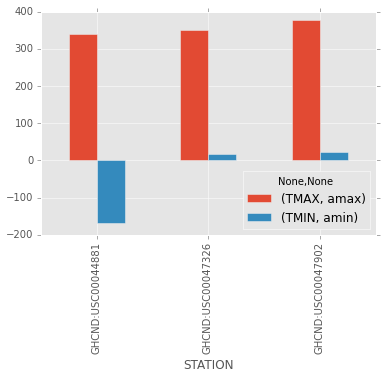

In [6]:
st = stations.groupby(['STATION'])
temp = st.agg({'TMIN' : [np.min], 'TMAX' : [np.max]})
temp.plot(kind='bar')

Analysing the plot above, we can see that the 3 cities experienced a big variation of temperature in the time of observation. The variation was more expressive in Lee Vining.

STATION
GHCND:USC00044881    Axes(0.125,0.125;0.775x0.775)
GHCND:USC00047326    Axes(0.125,0.125;0.775x0.775)
GHCND:USC00047902    Axes(0.125,0.125;0.775x0.775)
dtype: object

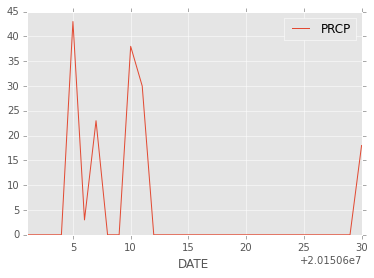

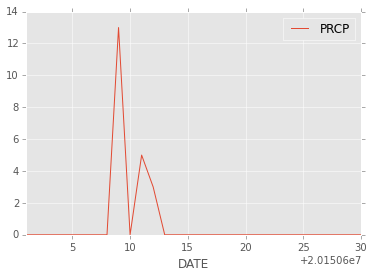

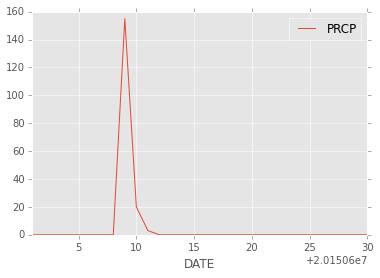

In [7]:
june = stations[(stations.DATE>=20150601) & (stations.DATE<=20150630)]
rain = june.groupby(['STATION'])
rain.plot('DATE','PRCP')

Among the three selected cities, Lee Vining (USC00044881) was the one with more raining days. However, in only one day it rained more in Santa Barbara (USC00047902) than the amount of rain in Lee Vining. When compared with those two cities, it almosted did not rain in Redondo Beach.